In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, log_loss
import warnings
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 모든 경고 메시지 무시
warnings.filterwarnings('ignore')

# 데이터 로드 및 전처리
df = pd.read_csv('C:/Users/user/Desktop/ML_project/data.csv')

In [70]:
df = df[df['Target'] != 'Enrolled']

In [71]:
df = df.replace({'Target':{'Dropout':1, 'Graduate':0}})

In [72]:
data = df.drop(columns=['Target'])
target = df['Target']

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [74]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

\# 초기 cv

Random Forest의 CV 평균 점수: 0.9015
Random Forest의 "Internal score": 1.0
Random Forest의 초기 손실 (Log Loss): 0.2875


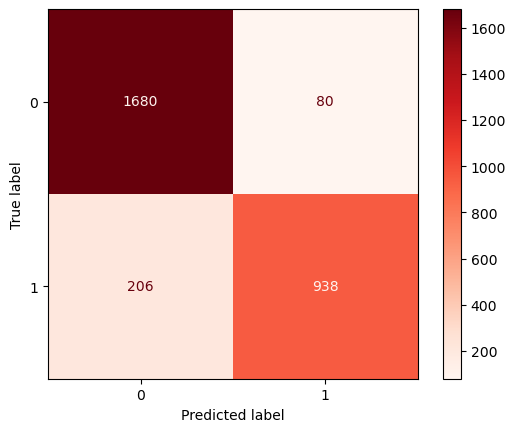

-----------------------------------------------------
Gradient Boosting의 CV 평균 점수: 0.9032
Gradient Boosting의 "Internal score": 0.9443296602387511
Gradient Boosting의 초기 손실 (Log Loss): 0.2517


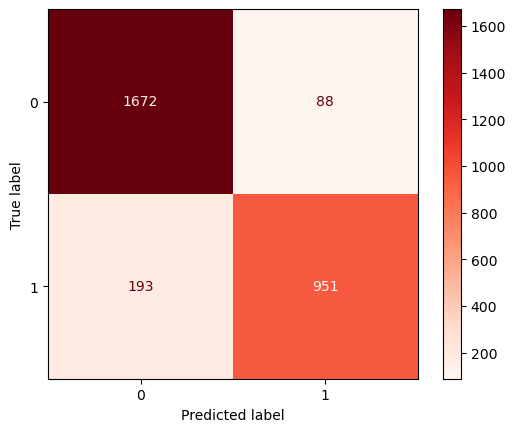

-----------------------------------------------------
XGBoost의 CV 평균 점수: 0.8957
XGBoost의 "Internal score": 1.0
XGBoost의 초기 손실 (Log Loss): 0.3287


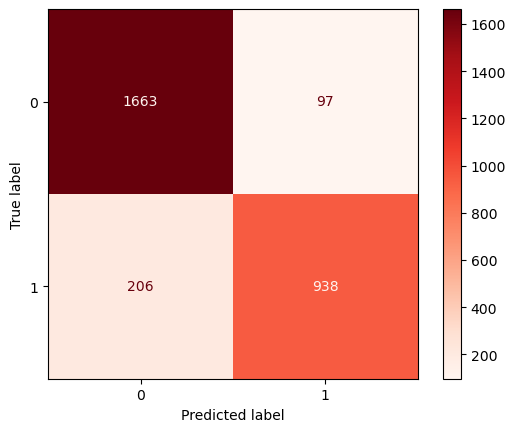

-----------------------------------------------------


In [77]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

# 모델 정의
rfc = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

test_score_list = []
train_score_list = []
init_loss = []

models = [rfc, gbc, xgb]
names = ['Random Forest', 'Gradient Boosting', 'XGBoost']

# 교차 검증 수행 및 결과 출력
for name, model in zip(names, models):
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    mean_score_test = np.mean(cv_results['test_score'])
    test_score_list.append(mean_score_test)
    mean_score_train = np.mean(cv_results['train_score'])
    train_score_list.append(mean_score_train)
    print(f"{name}의 CV 평균 점수: {mean_score_test:.4f}")
    print(f'{name}의 "Internal score": {mean_score_train}')

    # 교차 검증 예측
    y_pred = cross_val_predict(model, train_input, train_target, cv=4)
    
    # 혼동 행렬 계산
    conf_matrix = confusion_matrix(train_target, y_pred)
    
    # 정확도 계산
    accuracy = accuracy_score(train_target, y_pred)

    # 교차 검증 확률 예측 (log loss 계산을 위해)
    y_pred_proba = cross_val_predict(model, train_input, train_target, cv=4, method='predict_proba')
    
    # 손실 함수 (log loss) 계산
    loss = log_loss(train_target, y_pred_proba)
    init_loss.append(loss)
    print(f"{name}의 초기 손실 (Log Loss): {loss:.4f}")

    # 혼동 행렬 시각화
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Reds')
    plt.show()
    print('-----------------------------------------------------')

In [8]:
result = pd.DataFrame({'Model':names, 'Initial_cv':test_score_list, 'Initial(Internal)':train_score_list})
result

,Model,Initial_cv,Initial(Internal)
0,Random Forest,0.901515,1.00000
1,Gradient Boosting,0.903237,0.94433
2,XGBoost,0.895661,1.00000


---

\# RandomForest

In [9]:
params = {'n_estimators': [100,200, 300],
    'max_depth': [5,10,15,20,25]}

grid_search_rfc = GridSearchCV(rfc,
                               param_grid=params,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_rfc.fit(train_input, train_target)

# Best parameters
best_params = grid_search_rfc.best_params_

# Best index
best_index = grid_search_rfc.best_index_

# Internal accuracy (train score)
internal_accuracy = grid_search_rfc.cv_results_['mean_train_score'][best_index]

# External accuracy (test score)
external_accuracy = grid_search_rfc.cv_results_['mean_test_score'][best_index]

random_internal = internal_accuracy
random_external = external_accuracy

print(f"Best parameters for rfc: {best_params}")
print(f"Best training score for rfc: {internal_accuracy:.4f}")
print(f"Best validation score for rfc: {external_accuracy:.4f}")

Best parameters for rfc: {'max_depth': 10, 'n_estimators': 300}
Best training score for rfc: 0.9660
Best validation score for rfc: 0.9067


In [10]:
params = {'n_estimators': [250,300,330,350],
    'max_depth': [5,10,15,17,20],
    'min_samples_split': [2,4,6,8,10]}

grid_search_rfc = GridSearchCV(rfc,
                               param_grid=params,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_rfc.fit(train_input, train_target)

# Best parameters
best_params = grid_search_rfc.best_params_

# Best index
best_index = grid_search_rfc.best_index_

# Internal accuracy (train score)
internal_accuracy = grid_search_rfc.cv_results_['mean_train_score'][best_index]

# External accuracy (test score)
external_accuracy = grid_search_rfc.cv_results_['mean_test_score'][best_index]

random_internal = internal_accuracy
random_external = external_accuracy

print(f"Best parameters for rfc: {best_params}")
print(f"Best training score for rfc: {internal_accuracy:.4f}")
print(f"Best validation score for rfc: {external_accuracy:.4f}")

Best parameters for rfc: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 350}
Best training score for rfc: 0.9628
Best validation score for rfc: 0.9091


In [11]:
params = {'n_estimators': [330,350,360,370],
    'max_depth': [8,9,10,11,12,13],
    'min_samples_split': [2,3,4,5,6]}

grid_search_rfc = GridSearchCV(rfc,
                               param_grid=params,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_rfc.fit(train_input, train_target)

# Best parameters
best_params = grid_search_rfc.best_params_

# Best index
best_index = grid_search_rfc.best_index_

# Internal accuracy (train score)
internal_accuracy = grid_search_rfc.cv_results_['mean_train_score'][best_index]

# External accuracy (test score)
external_accuracy = grid_search_rfc.cv_results_['mean_test_score'][best_index]

random_internal = internal_accuracy
random_external = external_accuracy

print(f"Best parameters for rfc: {best_params}")
print(f"Best training score for rfc: {internal_accuracy:.4f}")
print(f"Best validation score for rfc: {external_accuracy:.4f}")

Best parameters for rfc: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 370}
Best training score for rfc: 0.9630
Best validation score for rfc: 0.9094


In [12]:
params = {'n_estimators': [350,360,370,380,390,400],
    'max_depth': [8,9,10,11,12,13],
    'min_samples_split': [2,3,4,5,6]}

grid_search_rfc = GridSearchCV(rfc,
                               param_grid=params,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_rfc.fit(train_input, train_target)

# Best parameters
best_params = grid_search_rfc.best_params_

# Best index
best_index = grid_search_rfc.best_index_

# Internal accuracy (train score)
internal_accuracy = grid_search_rfc.cv_results_['mean_train_score'][best_index]


# External accuracy (test score)
external_accuracy = grid_search_rfc.cv_results_['mean_test_score'][best_index]

random_internal = internal_accuracy
random_external = external_accuracy

print(f"Best parameters for rfc: {best_params}")
print(f"Best training score for rfc: {internal_accuracy:.4f}")
print(f"Best validation score for rfc: {external_accuracy:.4f}")

Best parameters for rfc: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 370}
Best training score for rfc: 0.9630
Best validation score for rfc: 0.9094


Log Loss for training set: 0.1476


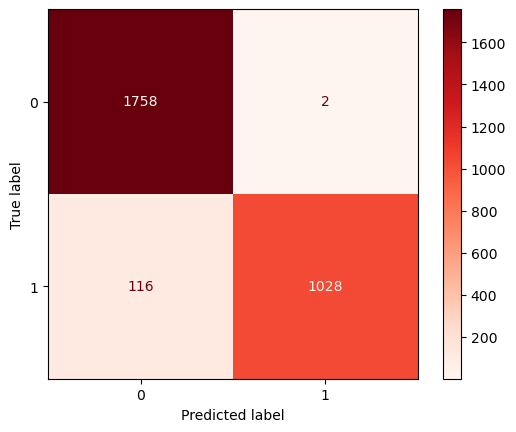

In [68]:
# Get the best model
best_rfc = grid_search_rfc.best_estimator_

# Predict on the training set (or another set if you prefer)
train_predictions = best_rfc.predict(train_input)

train_probabilities = best_rfc.predict_proba(train_input)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(train_target, train_predictions)

train_log_loss = log_loss(train_target, train_probabilities)
r_loss = train_log_loss
print(f"Log Loss for training set: {train_log_loss:.4f}")

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Reds')
plt.show()

n_estimators: 트리의 수를 늘려 안정성을 높이려 했다.  
max_depth: 트리의 깊이를 조절하여 과대적합을 방지하려 했다.  
min_samples_split: 분할 시 최소 샘플 수를 조절하여 모델 복잡도를 줄이려 했다.  
각 시도는 모델의 복잡도를 조정하고 과대적합을 완화하려는 시도  
검증 점수가 크게 개선되지 않은 것으로 보아, 데이터의 특성이나 추가적인 전처리, 혹은 다른 하이퍼파라미터의 조정이 필요할 수 있다.


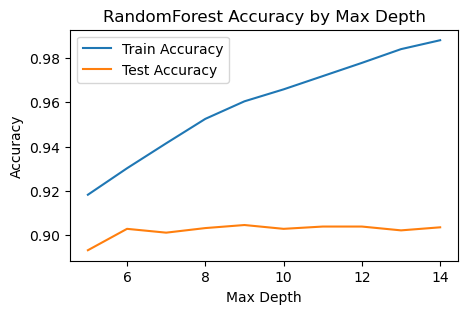

In [14]:
# Max_depth
train_scores = []
test_scores = []

for depth in range(5,15,1):
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot(range(5,15,1), train_scores, label='Train Accuracy')
plt.plot(range(5,15,1), test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RandomForest Accuracy by Max Depth')
plt.show()


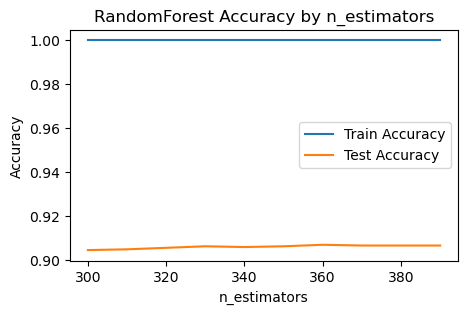

In [15]:
# 'n_estimators'
train_scores = []
test_scores = []

for n in range(300,400,10):
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot(range(300,400,10), train_scores, label='Train Accuracy')
plt.plot(range(300,400,10), test_scores, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RandomForest Accuracy by n_estimators')
plt.show()


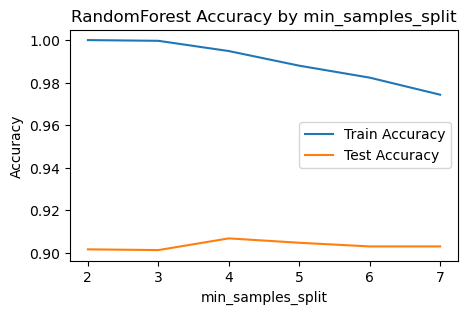

In [16]:
# 'min_samples_split': [2, 5, 10],

train_scores = []
test_scores = []

for n in range(2,8,1):
    model = RandomForestClassifier(min_samples_split=n, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot(range(2,8,1), train_scores, label='Train Accuracy')
plt.plot(range(2,8,1), test_scores, label='Test Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RandomForest Accuracy by min_samples_split')
plt.show()


                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.249401
24             Curricular units 1st sem (approved)    0.160454
31                Curricular units 2nd sem (grade)    0.130415
16                         Tuition fees up to date    0.071852
25                Curricular units 1st sem (grade)    0.064391
19                               Age at enrollment    0.028920
29          Curricular units 2nd sem (evaluations)    0.028392
23          Curricular units 1st sem (evaluations)    0.022412
12                                 Admission grade    0.021830
3                                           Course    0.020965
28             Curricular units 2nd sem (enrolled)    0.020879
18                              Scholarship holder    0.019851
22             Curricular units 1st sem (enrolled)    0.018209
6                   Previous qualification (grade)    0.015921
1                                 Application mode    0

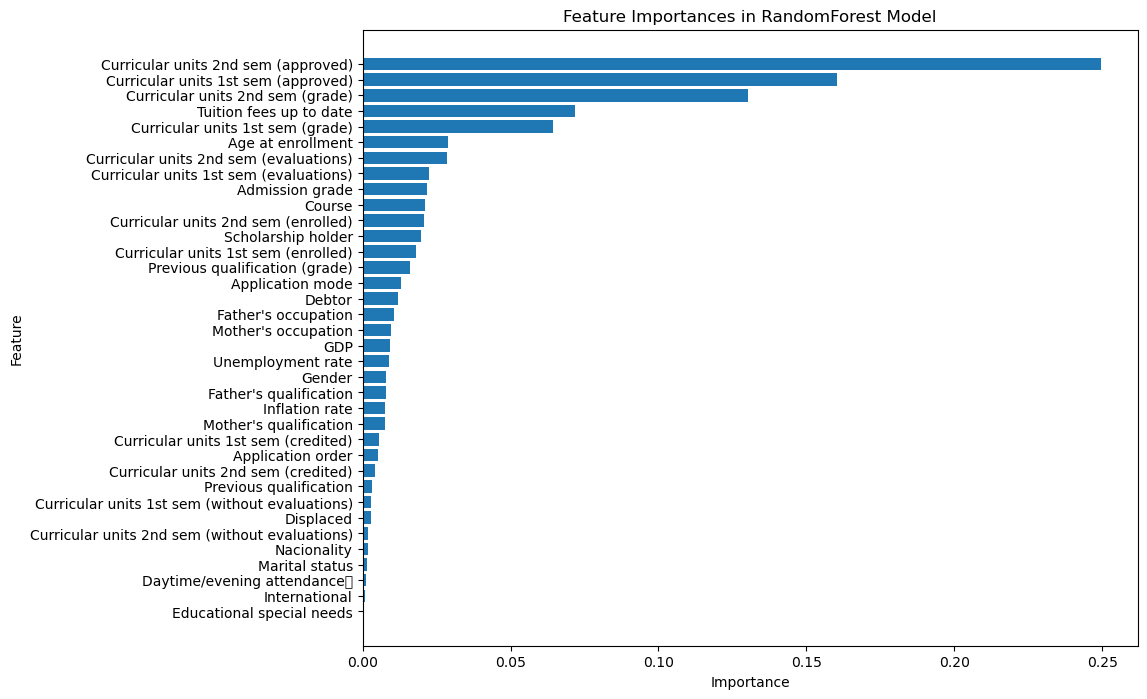

In [17]:
# RandomForest의 특성중요도
import pandas as pd
import matplotlib.pyplot as plt

train_input = pd.DataFrame(train_input)

# 특성 중요도 계산
feature_names = df.columns[train_input.columns]
feature_importances = best_rfc.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 특성 중요도 데이터프레임 출력
print(feature_importances_df.to_string())

# 가로 막대그래프 그리기
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForest Model')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬하기 위해 y축을 뒤집음
plt.show()

---

\# Gradient Boosting

In [18]:
params = {
    'n_estimators': [100, 200, 300, 400],      
    'learning_rate': [0.05, 0.1, 0.2, 0.3],      
    'max_depth': [3, 5, 7, 9]               
} 

grid_search_gbc = GridSearchCV(gbc,
                               param_grid=params,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_gbc.fit(train_input, train_target)

# Best parameters
best_params = grid_search_gbc.best_params_

# Best index
best_index = grid_search_gbc.best_index_

# Internal accuracy (train score)
internal_accuracy = grid_search_gbc.cv_results_['mean_train_score'][best_index]

# External accuracy (test score)
external_accuracy = grid_search_gbc.cv_results_['mean_test_score'][best_index]

gradient_internal = internal_accuracy
gradient_external = external_accuracy

print(f"Best parameters for gbc: {best_params}")
print(f"Best training score for gbc: {internal_accuracy:.4f}")
print(f"Best validation score for gbc: {external_accuracy:.4f}")

Best parameters for gbc: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}
Best training score for gbc: 0.9888
Best validation score for gbc: 0.9039


In [19]:
params = {
    'n_estimators': [350, 400, 450, 500],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [1,2,3,4]
}

grid_search_gbc = GridSearchCV(gbc,
                               param_grid=params,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_gbc.fit(train_input, train_target)

# Best parameters
best_params = grid_search_gbc.best_params_

# Best index
best_index = grid_search_gbc.best_index_

# Internal accuracy (train score)
internal_accuracy = grid_search_gbc.cv_results_['mean_train_score'][best_index]

# External accuracy (test score)
external_accuracy = grid_search_gbc.cv_results_['mean_test_score'][best_index]

gradient_internal = internal_accuracy
gradient_external = external_accuracy

print(f"Best parameters for gbc: {best_params}")
print(f"Best training score for gbc: {internal_accuracy:.4f}")
print(f"Best validation score for gbc: {external_accuracy:.4f}")

Best parameters for gbc: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 400}
Best training score for gbc: 0.9351
Best validation score for gbc: 0.9118


In [20]:
params = {
    'n_estimators': [380, 400, 420],
    'learning_rate': [0.01, 0.03, 0.05, 0.07],
    'max_depth': [2,3,4,5]
}

grid_search_gbc = GridSearchCV(gbc,
                               param_grid=params,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_gbc.fit(train_input, train_target)

# Best parameters
best_params = grid_search_gbc.best_params_

# Best index
best_index = grid_search_gbc.best_index_

# Internal accuracy (train score)
internal_accuracy = grid_search_gbc.cv_results_['mean_train_score'][best_index]

# External accuracy (test score)
external_accuracy = grid_search_gbc.cv_results_['mean_test_score'][best_index]

gradient_internal = internal_accuracy
gradient_external = external_accuracy

print(f"Best parameters for gbc: {best_params}")
print(f"Best training score for gbc: {internal_accuracy:.4f}")
print(f"Best validation score for gbc: {external_accuracy:.4f}")

Best parameters for gbc: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 420}
Best training score for gbc: 0.9371
Best validation score for gbc: 0.9125


In [21]:
params = {
    'n_estimators': [400, 420,430,440,450],
    'learning_rate': [0.03,0.04, 0.05, 0.06,0.07],
    'max_depth': [2,3,4,5]
}

grid_search_gbc = GridSearchCV(gbc,
                               param_grid=params,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_gbc.fit(train_input, train_target)

# Best parameters
best_params = grid_search_gbc.best_params_

# Best index
best_index = grid_search_gbc.best_index_

# Internal accuracy (train score)
internal_accuracy = grid_search_gbc.cv_results_['mean_train_score'][best_index]

# External accuracy (test score)
external_accuracy = grid_search_gbc.cv_results_['mean_test_score'][best_index]

gradient_internal = internal_accuracy
gradient_external = external_accuracy

print(f"Best parameters for gbc: {best_params}")
print(f"Best training score for gbc: {internal_accuracy:.4f}")
print(f"Best validation score for gbc: {external_accuracy:.4f}")

Best parameters for gbc: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 420}
Best training score for gbc: 0.9371
Best validation score for gbc: 0.9125


Log Loss for training set: 0.1909


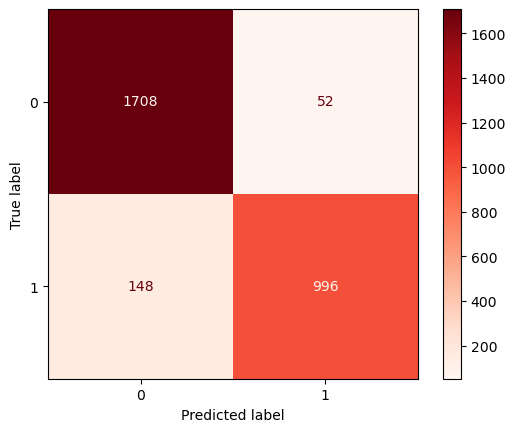

In [67]:
# Get the best model
best_gbc = grid_search_gbc.best_estimator_

# Predict on the training set (or another set if you prefer)
train_predictions = best_gbc.predict(train_input)
train_probabilities = best_gbc.predict_proba(train_input)

train_log_loss = log_loss(train_target, train_probabilities)
print(f"Log Loss for training set: {train_log_loss:.4f}")

g_loss = train_log_loss

# Calculate the confusion matrix
conf_matrix = confusion_matrix(train_target, train_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Reds')
plt.show()

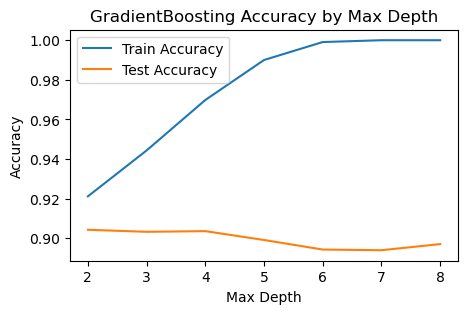

In [24]:
# GradientBoosting Max_depth
train_scores = []
test_scores = []

for depth in [2,3,4,5,6,7,8]:
    model = GradientBoostingClassifier(max_depth=depth, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot([2,3,4,5,6,7,8], train_scores, label='Train Accuracy')
plt.plot([2, 3,4,5,6,7,8], test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('GradientBoosting Accuracy by Max Depth')
plt.show()

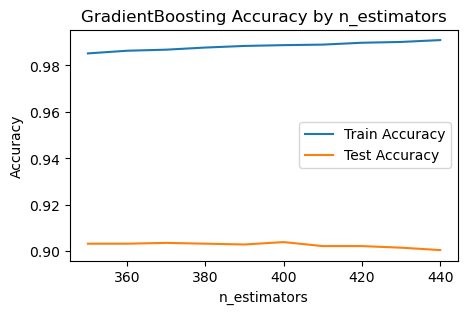

In [25]:
# 'GradientBoosting n_estimators'
train_scores = []
test_scores = []

for n in range(350,450,10):
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot(range(350,450,10), train_scores, label='Train Accuracy')
plt.plot(range(350,450,10), test_scores, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('GradientBoosting Accuracy by n_estimators')
plt.show()

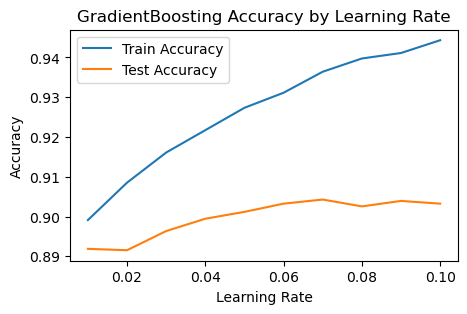

In [26]:
# 'GradientBoosting learning_rate': [0.079, 0.08, 0.081]
learning_rates = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]  

train_scores = []
test_scores = []

for rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=rate, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5,3))
plt.plot(learning_rates, train_scores,label='Train Accuracy')
plt.plot(learning_rates, test_scores, label='Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.title('GradientBoosting Accuracy by Learning Rate')
plt.show()

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.709796
16                         Tuition fees up to date    0.075397
28             Curricular units 2nd sem (enrolled)    0.037061
24             Curricular units 1st sem (approved)    0.030300
31                Curricular units 2nd sem (grade)    0.027750
22             Curricular units 1st sem (enrolled)    0.025467
18                              Scholarship holder    0.014914
29          Curricular units 2nd sem (evaluations)    0.011138
3                                           Course    0.010789
19                               Age at enrollment    0.010463
12                                 Admission grade    0.008174
21             Curricular units 1st sem (credited)    0.006976
27             Curricular units 2nd sem (credited)    0.005309
10                             Mother's occupation    0.004209
15                                          Debtor    0

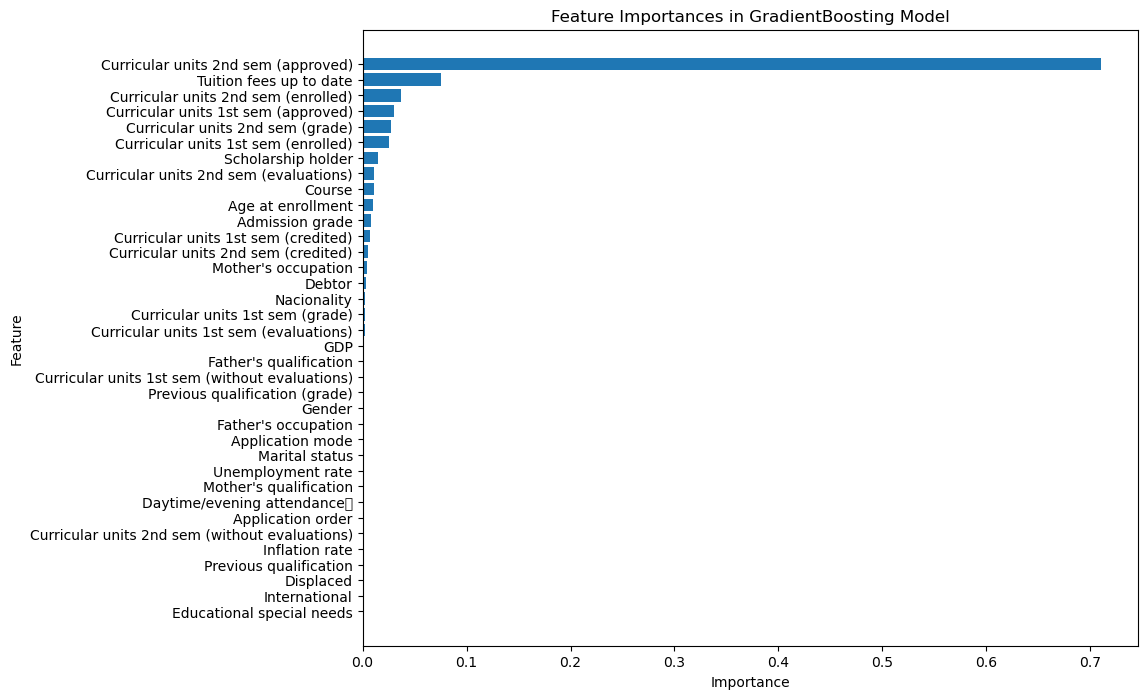

In [27]:
# GradientBoost의 특성중요도

import pandas as pd
import matplotlib.pyplot as plt

# 특성 중요도 계산
feature_names = df.columns[train_input.columns]
feature_importances = best_gbc.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 특성 중요도 데이터프레임 출력
print(feature_importances_df.to_string())

# 가로 막대그래프 그리기
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in GradientBoosting Model')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬하기 위해 y축을 뒤집음
plt.show()


---

\# XGBoost

In [28]:
param_grid = {
    'n_estimators': [50, 100, 200],  # 결정 트리 개수
    'max_depth': [3, 5, 7],           # 트리의 최대 깊이
    'learning_rate': [0.1, 0.01, 0.05],  # 학습률
    'subsample': [0.7, 0.8, 0.9],     # 훈련 데이터 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 0.9],  # 각 트리마다 사용하는 feature 비율
    'gamma': [0, 1, 5]                # 가지치기를 결정하기 위한 최소 손실 감소 값
}
grid_search_xgb = GridSearchCV(xgb,
                               param_grid,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_xgb.fit(train_input, train_target)

best_params = grid_search_xgb.best_params_
best_index = grid_search_xgb.best_index_

internal_accuracy = grid_search_xgb.cv_results_['mean_train_score'][best_index]
external_accuracy = grid_search_xgb.cv_results_['mean_test_score'][best_index]

xgb_internal = internal_accuracy
xgb_external = external_accuracy

print(f"Best parameters for xgb: {best_params}")
print(f"Best training score for xgb: {internal_accuracy:.4f}")
print(f"Best validation score for xgb: {external_accuracy:.4f}")

Best parameters for xgb: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best training score for xgb: 0.9369
Best validation score for xgb: 0.9112


In [29]:
# 파라미터가 크거나 작아지는 방향으로 범위 증가

param_grid = {
    'n_estimators': [150,200,250],  # 결정 트리 개수
    'max_depth': [3,4,5],           # 트리의 최대 깊이
    'learning_rate': [0.03, 0.05,0.07],  # 학습률
    'subsample': [0.7, 0.8, 0.9],     # 훈련 데이터 샘플링 비율
    'colsample_bytree': [0.6,0.7, 0.8],  # 각 트리마다 사용하는 feature 비율
    'gamma': [0, 1, 3]                # 가지치기를 결정하기 위한 최소 손실 감소 값
}
grid_search_xgb = GridSearchCV(xgb,
                               param_grid,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_xgb.fit(train_input, train_target)

best_params = grid_search_xgb.best_params_
best_index = grid_search_xgb.best_index_

internal_accuracy = grid_search_xgb.cv_results_['mean_train_score'][best_index]
external_accuracy = grid_search_xgb.cv_results_['mean_test_score'][best_index]

xgb_internal = internal_accuracy
xgb_external = external_accuracy

print(f"Best parameters for xgb: {best_params}")
print(f"Best training score for xgb: {internal_accuracy:.4f}")
print(f"Best validation score for xgb: {external_accuracy:.4f}")

Best parameters for xgb: {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Best training score for xgb: 0.9466
Best validation score for xgb: 0.9125


In [30]:
# 파라미터를 세밀하게 조정
param_grid = {
    'n_estimators': [190,200,210],  # 결정 트리 개수
    'max_depth': [3,5],           # 트리의 최대 깊이
    'learning_rate': [0.1,0.05,0.07,0.09],  # 학습률
    'subsample': [0.6,0.7,0.8],     # 훈련 데이터 샘플링 비율
    'colsample_bytree': [0.6,0.7],  # 각 트리마다 사용하는 feature 비율
    'gamma': [0,1,2]                # 가지치기를 결정하기 위한 최소 손실 감소 값
}
grid_search_xgb = GridSearchCV(xgb,
                               param_grid,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_xgb.fit(train_input, train_target)

best_params = grid_search_xgb.best_params_
best_index = grid_search_xgb.best_index_

internal_accuracy = grid_search_xgb.cv_results_['mean_train_score'][best_index]
external_accuracy = grid_search_xgb.cv_results_['mean_test_score'][best_index]

xgb_internal = internal_accuracy
xgb_external = external_accuracy

print(f"Best parameters for xgb: {best_params}")
print(f"Best training score for xgb: {internal_accuracy:.4f}")
print(f"Best validation score for xgb: {external_accuracy:.4f}")

Best parameters for xgb: {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Best training score for xgb: 0.9466
Best validation score for xgb: 0.9125


In [31]:
# 파라미터를 더 세밀하게 조정
param_grid = {
    'n_estimators': [195,200,205],  # 결정 트리 개수
    'max_depth': [2,3,4],           # 트리의 최대 깊이
    'learning_rate': [0.06,0.07,0.08],  # 학습률
    'subsample': [0.6,0.7,0.8],     # 훈련 데이터 샘플링 비율
    'colsample_bytree': [0.6,0.7],  # 각 트리마다 사용하는 feature 비율
    'gamma': [0,1,2]                # 가지치기를 결정하기 위한 최소 손실 감소 값
}
grid_search_xgb = GridSearchCV(xgb,
                               param_grid,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_xgb.fit(train_input, train_target)

best_params = grid_search_xgb.best_params_
best_index = grid_search_xgb.best_index_

internal_accuracy = grid_search_xgb.cv_results_['mean_train_score'][best_index]
external_accuracy = grid_search_xgb.cv_results_['mean_test_score'][best_index]

xgb_internal = internal_accuracy
xgb_external = external_accuracy

print(f"Best parameters for xgb: {best_params}")
print(f"Best training score for xgb: {internal_accuracy:.4f}")
print(f"Best validation score for xgb: {external_accuracy:.4f}")

Best parameters for xgb: {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Best training score for xgb: 0.9466
Best validation score for xgb: 0.9125


In [32]:
# 더 세밀하게 조정 가능한 파라미터 조정

param_grid = {
    'n_estimators': [198,200,202],  # 결정 트리 개수
    'max_depth': [3],           # 트리의 최대 깊이
    'learning_rate': [0.07],  # 학습률
    'subsample': [0.7],     # 훈련 데이터 샘플링 비율
    'colsample_bytree': [0.6],  # 각 트리마다 사용하는 feature 비율
    'gamma': [1]                # 가지치기를 결정하기 위한 최소 손실 감소 값
}
grid_search_xgb = GridSearchCV(xgb,
                               param_grid,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               scoring="accuracy")
grid_search_xgb.fit(train_input, train_target)

best_params = grid_search_xgb.best_params_
best_index = grid_search_xgb.best_index_

internal_accuracy = grid_search_xgb.cv_results_['mean_train_score'][best_index]
external_accuracy = grid_search_xgb.cv_results_['mean_test_score'][best_index]

xgb_internal = internal_accuracy
xgb_external = external_accuracy

print(f"Best parameters for xgb: {best_params}")
print(f"Best training score for xgb: {internal_accuracy:.4f}")
print(f"Best validation score for xgb: {external_accuracy:.4f}")

Best parameters for xgb: {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 198, 'subsample': 0.7}
Best training score for xgb: 0.9461
Best validation score for xgb: 0.9129


Log Loss for training set: 0.1642


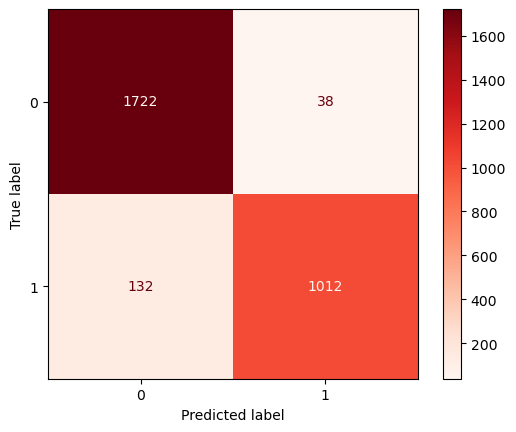

In [66]:
# Get the best model
best_xgb = grid_search_xgb.best_estimator_

# Predict on the training set (or another set if you prefer)
train_predictions = best_xgb.predict(train_input)
train_probabilities = best_xgb.predict_proba(train_input)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(train_target, train_predictions)

train_log_loss = log_loss(train_target, train_probabilities)
x_loss = train_log_loss
print(f"Log Loss for training set: {train_log_loss:.4f}")

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Reds')
plt.show()

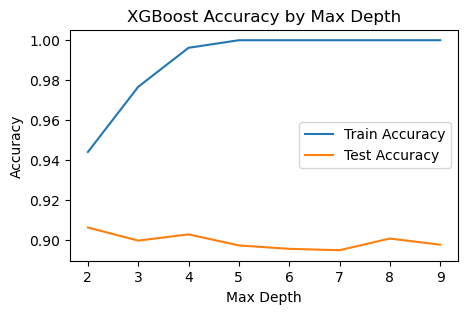

In [34]:
# Max_depth
train_scores = []
test_scores = []

for depth in range(2,10,1):
    model = XGBClassifier(max_depth=depth, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot(range(2,10,1), train_scores, label='Train Accuracy')
plt.plot(range(2,10,1), test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('XGBoost Accuracy by Max Depth')
plt.show()

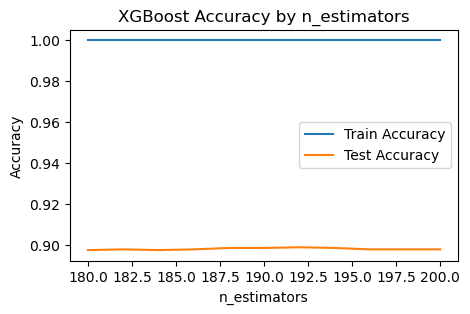

In [35]:
# n_estimators
train_scores = []
test_scores = []

for n in range(180,202,2):
    model = XGBClassifier(n_estimators=n, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot(range(180,202,2), train_scores, label='Train Accuracy')
plt.plot(range(180,202,2), test_scores, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('XGBoost Accuracy by n_estimators')
plt.show()

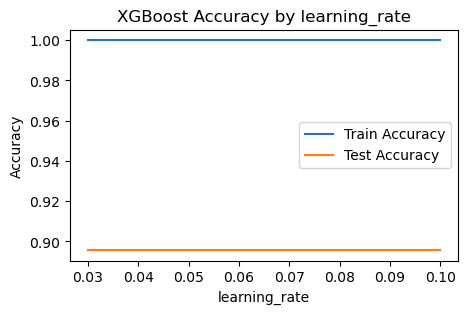

In [36]:
l = [0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]  

train_scores = []
test_scores = []

for n in l:
    model = XGBClassifier(learning_rates=n, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot(l, train_scores,label='Train Accuracy')
plt.plot(l, test_scores, label='Test Accuracy')
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.legend()
plt.title('XGBoost Accuracy by learning_rate')
plt.show()

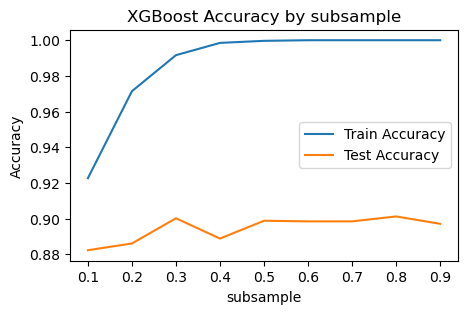

In [37]:
l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  

train_scores = []
test_scores = []

for n in l:
    model = XGBClassifier(subsample=n, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot(l, train_scores,label='Train Accuracy')
plt.plot(l, test_scores, label='Test Accuracy')
plt.xlabel('subsample')
plt.ylabel('Accuracy')
plt.legend()
plt.title('XGBoost Accuracy by subsample')
plt.show()

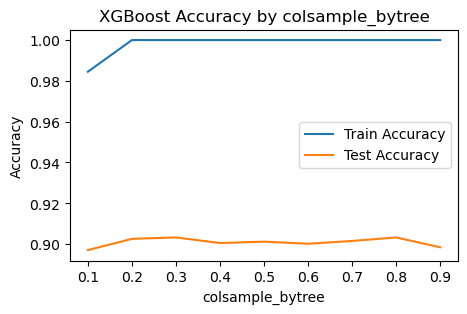

In [38]:
l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  

train_scores = []
test_scores = []

for n in l:
    model = XGBClassifier(colsample_bytree=n, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot(l, train_scores,label='Train Accuracy')
plt.plot(l, test_scores, label='Test Accuracy')
plt.xlabel('colsample_bytree')
plt.ylabel('Accuracy')
plt.legend()
plt.title('XGBoost Accuracy by colsample_bytree')
plt.show()

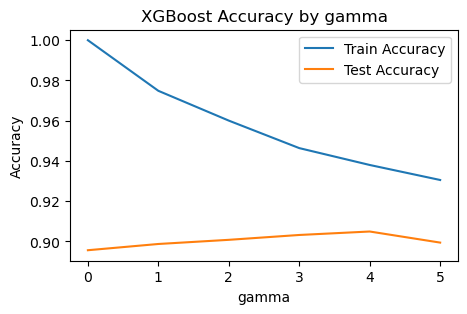

In [39]:
l = [0,1,2,3,4,5]  

train_scores = []
test_scores = []

for n in l:
    model = XGBClassifier(gamma=n, random_state=42)
    cv_results = cross_validate(model, train_input, train_target, cv=4,return_train_score=True, scoring='accuracy')
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

plt.figure(figsize=(5, 3))
plt.plot(l, train_scores,label='Train Accuracy')
plt.plot(l, test_scores, label='Test Accuracy')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.legend()
plt.title('XGBoost Accuracy by gamma')
plt.show()

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.185312
24             Curricular units 1st sem (approved)    0.118055
16                         Tuition fees up to date    0.096272
31                Curricular units 2nd sem (grade)    0.045129
28             Curricular units 2nd sem (enrolled)    0.042695
18                              Scholarship holder    0.042410
22             Curricular units 1st sem (enrolled)    0.040387
29          Curricular units 2nd sem (evaluations)    0.037650
25                Curricular units 1st sem (grade)    0.031524
23          Curricular units 1st sem (evaluations)    0.023012
15                                          Debtor    0.022770
17                                          Gender    0.020994
19                               Age at enrollment    0.020167
27             Curricular units 2nd sem (credited)    0.019440
3                                           Course    0

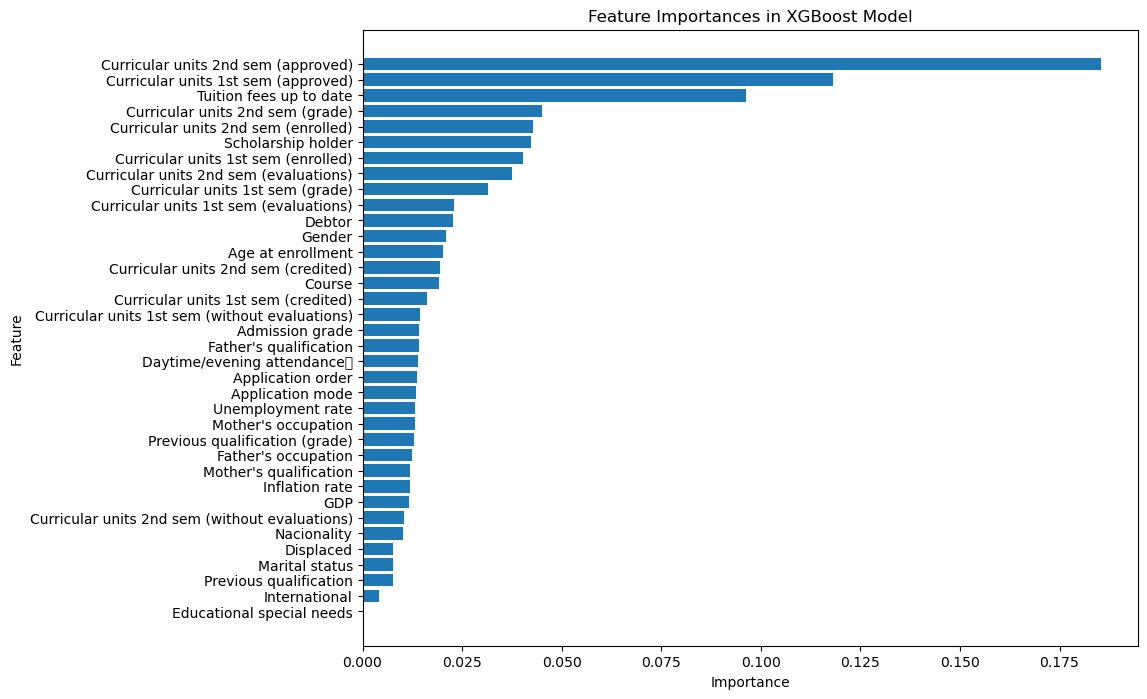

In [40]:
# XGBoost의 특성중요도

import pandas as pd
import matplotlib.pyplot as plt

# 특성 중요도 계산
feature_names = df.columns[train_input.columns]
feature_importances = best_xgb.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 특성 중요도 데이터프레임 출력
print(feature_importances_df.to_string())

# 가로 막대그래프 그리기
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGBoost Model')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬하기 위해 y축을 뒤집음
plt.show()


---

In [41]:
result

,Model,Initial_cv,Initial(Internal)
0,Random Forest,0.901515,1.00000
1,Gradient Boosting,0.903237,0.94433
2,XGBoost,0.895661,1.00000


In [42]:
result['Hyper_external'] = [random_external,gradient_external,xgb_external]
result['Hyper_Internal'] = [random_internal, gradient_internal,xgb_internal]
result

,Model,Initial_cv,Initial(Internal),Hyper_external,Hyper_Internal
0,Random Forest,0.901515,1.00000,0.909435,0.963039
1,Gradient Boosting,0.903237,0.94433,0.912534,0.937098
2,XGBoost,0.895661,1.00000,0.912879,0.946051


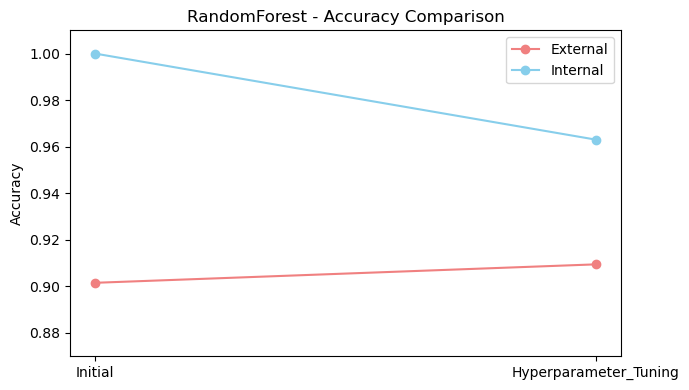

In [58]:
# Random

Ex_list = [result.iloc[0][1],result.iloc[0][3]]
In_list = [result.iloc[0][2],result.iloc[0][4]]

fix, ax = plt.subplots(figsize = (7,4))

ax.plot(['Initial', 'Hyperparameter_Tuning'], Ex_list, marker='o', linestyle='-', color='lightcoral', label='External')
ax.plot(['Initial', 'Hyperparameter_Tuning'], In_list, marker='o', linestyle='-', color='skyblue', label='Internal')
ax.set_ylabel('Accuracy')
ax.set_title('RandomForest - Accuracy Comparison')
plt.xticks(rotation=0)
plt.legend()
plt.ylim(0.87,1.01)
plt.tight_layout()
plt.show()

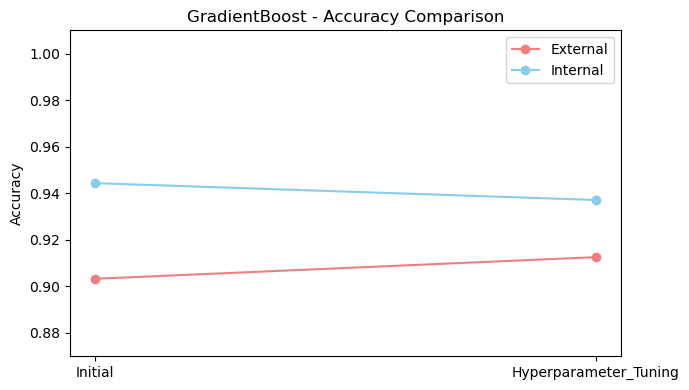

In [59]:
# Gradient

Ex_list = [result.iloc[1][1],result.iloc[1][3]]
In_list = [result.iloc[1][2],result.iloc[1][4]]

fix, ax = plt.subplots(figsize = (7,4))

ax.plot(['Initial', 'Hyperparameter_Tuning'], Ex_list, marker='o', linestyle='-', color='lightcoral', label='External')
ax.plot(['Initial', 'Hyperparameter_Tuning'], In_list, marker='o', linestyle='-', color='skyblue', label='Internal')
ax.set_ylabel('Accuracy')
ax.set_title('GradientBoost - Accuracy Comparison')
plt.xticks(rotation=0)
plt.legend()
plt.ylim(0.87,1.01)
plt.tight_layout()
plt.show()

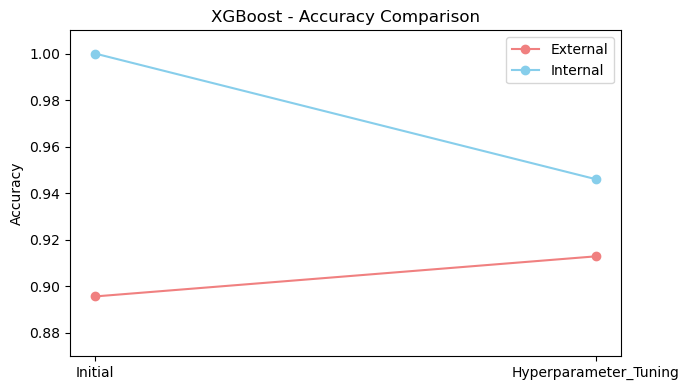

In [60]:
# XGBoost

Ex_list = [result.iloc[2][1],result.iloc[2][3]]
In_list = [result.iloc[2][2],result.iloc[2][4]]

fix, ax = plt.subplots(figsize = (7,4))

ax.plot(['Initial', 'Hyperparameter_Tuning'], Ex_list, marker='o', linestyle='-', color='lightcoral', label='External')
ax.plot(['Initial', 'Hyperparameter_Tuning'], In_list, marker='o', linestyle='-', color='skyblue', label='Internal')
ax.set_ylabel('Accuracy')
ax.set_title('XGBoost - Accuracy Comparison')
plt.xticks(rotation=0)
plt.legend()
plt.ylim(0.87,1.01)
plt.tight_layout()
plt.show()

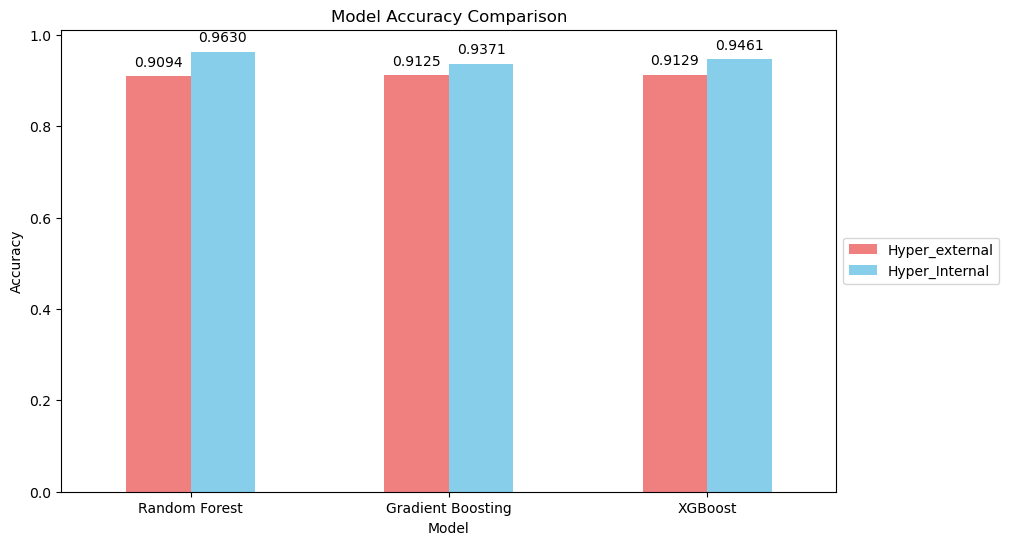

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
colors=['lightcoral','skyblue']
result.iloc[:,[0,3,4]].plot(kind='bar', x='Model', ax=ax, color=colors)
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# 범례 설명을 그래프 밖으로 빼기
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

\# 손실함수(초기, 하이퍼파라미터튜닝 후 비교)

In [83]:
loss_result = pd.DataFrame()
loss_result['Model'] = ['RandomForest','GradientBoosting','XGBoost']
loss_result['Initial']=init_loss
loss_result['Hyperparameter Tuning'] = [r_loss, g_loss, x_loss]
loss_result

,Model,Initial,Hyperparameter Tuning
0,RandomForest,0.287455,0.147555
1,GradientBoosting,0.251729,0.190866
2,XGBoost,0.328678,0.164217


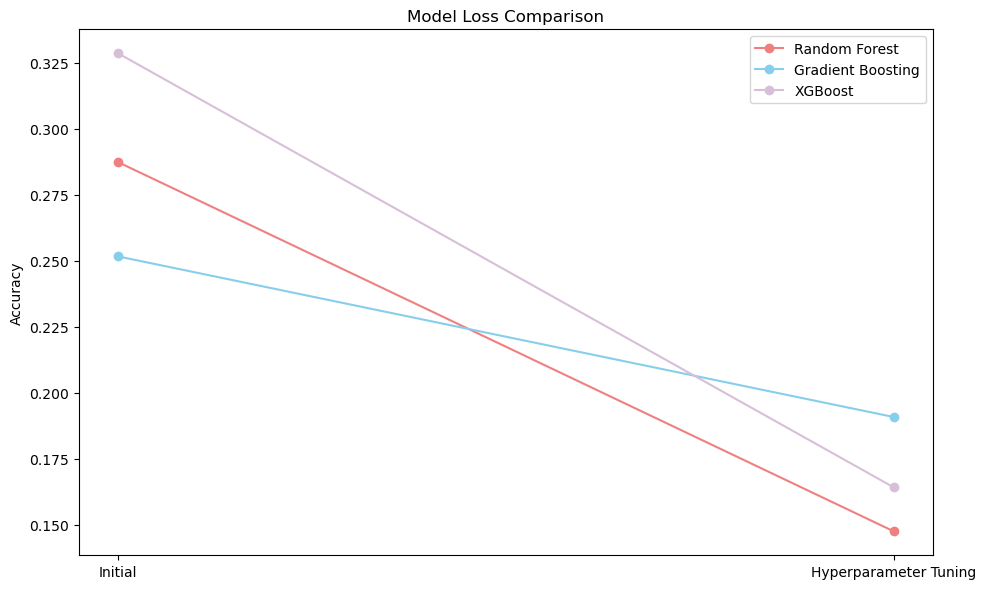

In [91]:
r = [loss_result.iloc[0,:][1],loss_result.iloc[0,:][2]]
g= [loss_result.iloc[1,:][1],loss_result.iloc[1,:][2]]
x = [loss_result.iloc[2,:][1],loss_result.iloc[2,:][2]]

# 라인 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
# 각 모델의 정확도를 라인 그래프로 플로팅
ax.plot(['Initial', 'Hyperparameter Tuning'], r, marker='o', linestyle='-', color='lightcoral', label='Random Forest')
ax.plot(['Initial', 'Hyperparameter Tuning'], g, marker='o', linestyle='-', color='skyblue', label='Gradient Boosting')
ax.plot(['Initial', 'Hyperparameter Tuning'], x, marker='o', linestyle='-', color='thistle', label='XGBoost')
ax.set_ylabel('Accuracy')
ax.set_title('Model Loss Comparison')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

---

가장 성능이 좋은 XGBoost 모델에 테스트 데이터 적용

In [90]:
param_grid = {
    'n_estimators': [198],  # 결정 트리 개수
    'max_depth': [3],           # 트리의 최대 깊이
    'learning_rate': [0.07],  # 학습률
    'subsample': [0.7],     # 훈련 데이터 샘플링 비율
    'colsample_bytree': [0.6],  # 각 트리마다 사용하는 feature 비율
    'gamma': [1]                # 가지치기를 결정하기 위한 최소 손실 감소 값
}
# GridSearchCV 객체 생성
grid_search = GridSearchCV(xgb, param_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=1)
# 그리드 서치 수행
grid_search.fit(train_input, train_target)
# 테스트 세트에서의 성능 평가
test_score = grid_search.score(test_input, test_target)
print("테스트 세트에서의 정확도: ", test_score)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
테스트 세트에서의 정확도:  0.9035812672176309
